# 人脸识别

- 输入：人脸图像url
- 输出：人脸识别信息

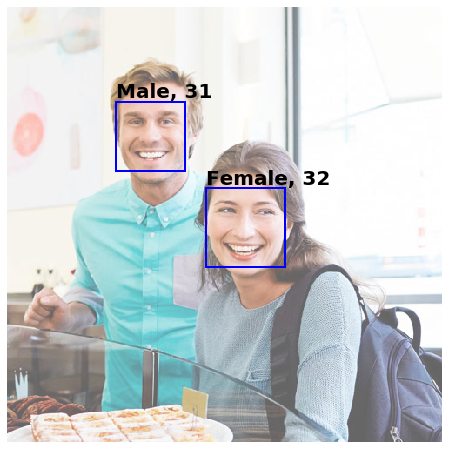

In [8]:
import requests
from IPython.display import HTML
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO


subscription_key = 'YourSubscriptionKey' # 改成自己的Key
assert subscription_key
face_api_url = 'https://face-jerry.cognitiveservices.azure.com/face/v1.0/detect' # 改成自己的站点


headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")
    
annotate_image("https://how-old.net/Images/faces2/main007.jpg")

# 计算机视觉

- 输入： 图像url
- 输出： 图像描述

In [16]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import requests
import json

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'YourSubscriptionKey', # 改成自己的key
}

params = urllib.parse.urlencode({
    # Request parameters
    'visualFeatures': 'Description',
    'language': 'zh',
})

url = 'https://xxx/vision/v2.0/analyze' # 改成自己的站点
image_url = 'https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1578645908953&di=46e321d21c2277d40e9c1897a3b38b21&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fq_70%2Cc_zoom%2Cw_640%2Fimages%2F20180621%2Fbb1ecbe5854a4bbab310fee4811e2be5.jpeg' # 可以修改图片的地址

response = requests.post(url, params=params, headers=headers, json={"url": image_url})
vison = response.json()

print(vison)

{'description': {'tags': ['动物', '室内', '大象', '恐龙', '站', '桌子', '走', '宝宝', '一群', '大', '人们', '男人', '房间', '马', '女人', '水', '显示器', '围墙'], 'captions': [{'text': '恐龙的雕塑', 'confidence': 0.6231880158395597}]}, 'requestId': '47b9c036-487f-4f38-a69b-29a200513ede', 'metadata': {'width': 640, 'height': 640, 'format': 'Jpeg'}}


# 语音合成

- 输入： 文本

- 输出： 音频文件（wav格式）

In [6]:
import azure.cognitiveservices.speech as speechsdk

# Creates an instance of a speech config with specified subscription key and service region.
# Replace with your own subscription key and service region (e.g., "westus").
speech_key, service_region = "YourSubscriptionKey", "eastasia"  # 你的key 和站点
speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)

# Creates an audio configuration that points to an audio file.
# Replace with your own audio filename.
audio_filename = "helloworld.wav"  # 文件名称
audio_output = speechsdk.AudioOutputConfig(filename=audio_filename)

# Creates a synthesizer with the given settings
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_output)

# Synthesizes the text to speech.
# Replace with your own text.
text = "Hello world!"  
result = speech_synthesizer.speak_text_async(text).get()

# Checks result.
if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
    print("Speech synthesized to [{}] for text [{}]".format(audio_filename, text))
elif result.reason == speechsdk.ResultReason.Canceled:
    cancellation_details = result.cancellation_details
    print("Speech synthesis canceled: {}".format(cancellation_details.reason))
    if cancellation_details.reason == speechsdk.CancellationReason.Error:
        if cancellation_details.error_details:
            print("Error details: {}".format(cancellation_details.error_details))
    print("Did you update the subscription info?")

Speech synthesized to [helloworld.wav] for text [Hello world!]
